---
title: "historic Cleaning"
subtitle: "A DSAN Scholarship Project"
author: "Kangheng Liu"
date: last-modified
date-format: long
format:
    html:
        theme:
            dark: 
                - cosmo
                - style/html-sta313.scss
                - style/html-dark.scss
                - style/my-adjustments.scss
            light: 
                - cosmo
                - style/html-sta313.scss
        toc: true
        code-copy: true
        code-overflow: wrap
        mainfont: "Atkinson Hyperlegible"
        code-annotations: hover
        self-contained: true
execute:
    echo: true
    warning: false
    message: false
    freeze: auto
filters:
    - openlinksinnewpage
lightbox: auto
---

In [2]:
import pandas as pd
import numpy as np

## historic Cleaning

In [3]:
# Load in historic

historic = pd.read_csv('../historic/NABR_historic.csv')
nearterm = pd.read_csv('../historic/nearterm_historic_2020-2024.csv')

In [4]:
historic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13821 entries, 0 to 13820
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   long                                    13821 non-null  float64
 1   lat                                     13821 non-null  float64
 2   year                                    13821 non-null  int64  
 3   TimePeriod                              13821 non-null  object 
 4   RCP                                     13821 non-null  object 
 5   scenario                                13821 non-null  object 
 6   treecanopy                              13821 non-null  int64  
 7   Ann_Herb                                13821 non-null  int64  
 8   Bare                                    13821 non-null  int64  
 9   Herb                                    13821 non-null  int64  
 10  Litter                                  13821 non-null  in

In [5]:
historic.head()

long       lat  year TimePeriod         RCP scenario  treecanopy  \
0 -110.0472  37.60413  1980       Hist  historical      sc1           0   
1 -110.0472  37.60413  1980       Hist  historical      sc1           0   
2 -110.0472  37.60413  1980       Hist  historical      sc1           0   
3 -110.0472  37.60413  1980       Hist  historical      sc1           0   
4 -110.0472  37.60413  1980       Hist  historical      sc1           0   

   Ann_Herb  Bare  Herb  ...  PPT_Annual  T_Winter  T_Summer   T_Annual  \
0         0    84     5  ...       13.79  0.964835  23.15924  23.159240   
1         0    84     5  ...        2.69  0.964835  23.15924   0.964835   
2         0    84     5  ...       13.79  0.964835  23.15924   0.964835   
3         0    84     5  ...        2.69  0.964835  23.15924  23.159240   
4         0    84     5  ...         NaN       NaN       NaN        NaN   

   Tmax_Summer  Tmin_Winter  VWC_Winter_whole  VWC_Spring_whole  \
0        37.05          NaN               NaN               NaN   
1        37.05          NaN               NaN               NaN   
2        37.05          NaN               NaN               NaN   
3        37.05          NaN               NaN               NaN   
4          NaN       -12.45          0.113447          0.096831   

   VWC_Summer_whole  VWC_Fall_whole  
0               NaN             NaN  
1               NaN             NaN  
2               NaN             NaN  
3               NaN             NaN  
4          0.041876        0.052298  

[5 rows x 29 columns]

In [6]:
# Check for missing values for both datasets

historic.isnull().sum()

long                                         0
lat                                          0
year                                         0
TimePeriod                                   0
RCP                                          0
scenario                                     0
treecanopy                                   0
Ann_Herb                                     0
Bare                                         0
Herb                                         0
Litter                                       0
Shrub                                        0
DrySoilDays_Summer_whole                  9345
Evap_Summer                               9345
ExtremeShortTermDryStress_Summer_whole    9345
FrostDays_Winter                          9345
NonDrySWA_Summer_whole                    9368
PPT_Winter                                4368
PPT_Summer                                4368
PPT_Annual                                5891
T_Winter                                  4368
T_Summer     

In [7]:
nearterm.isnull().sum()

long                                          0
lat                                           0
year                                          0
TimePeriod                                    0
RCP                                           0
scenario                                      0
treecanopy                                    0
Ann_Herb                                      0
Bare                                          0
Herb                                          0
Litter                                        0
Shrub                                         0
DrySoilDays_Summer_whole                  37529
Evap_Summer                               37529
ExtremeShortTermDryStress_Summer_whole    37535
FrostDays_Winter                          37529
NonDrySWA_Summer_whole                    37630
PPT_Winter                                17920
PPT_Summer                                17920
PPT_Annual                                23802
T_Winter                                

In [8]:
# # Delete rows with missing values

# historic = historic.dropna()

# nearterm = nearterm.dropna()

# Check for duplicates

historic.duplicated().sum()

nearterm.duplicated().sum()

10

## EDA

In [9]:
# remove columns with type is string

historic = historic.select_dtypes(exclude=['object'])

nearterm = nearterm.select_dtypes(exclude=['object'])


<Axes: >

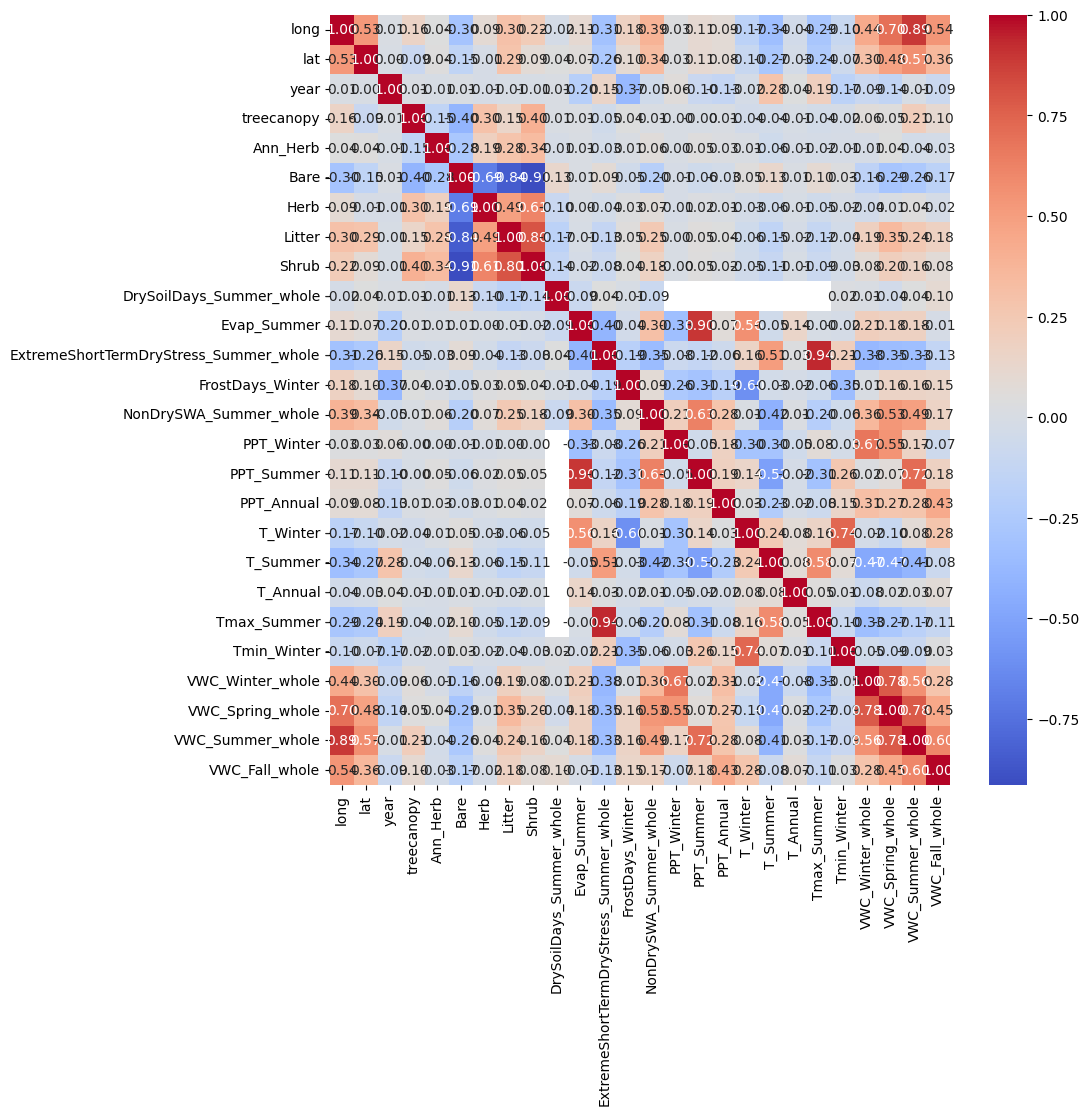

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Draw a heatmap of the correlation matrix

plt.figure(figsize=(10, 10))
sns.heatmap(historic.corr(), annot=True, cmap='coolwarm', fmt='.2f')

<Axes: >

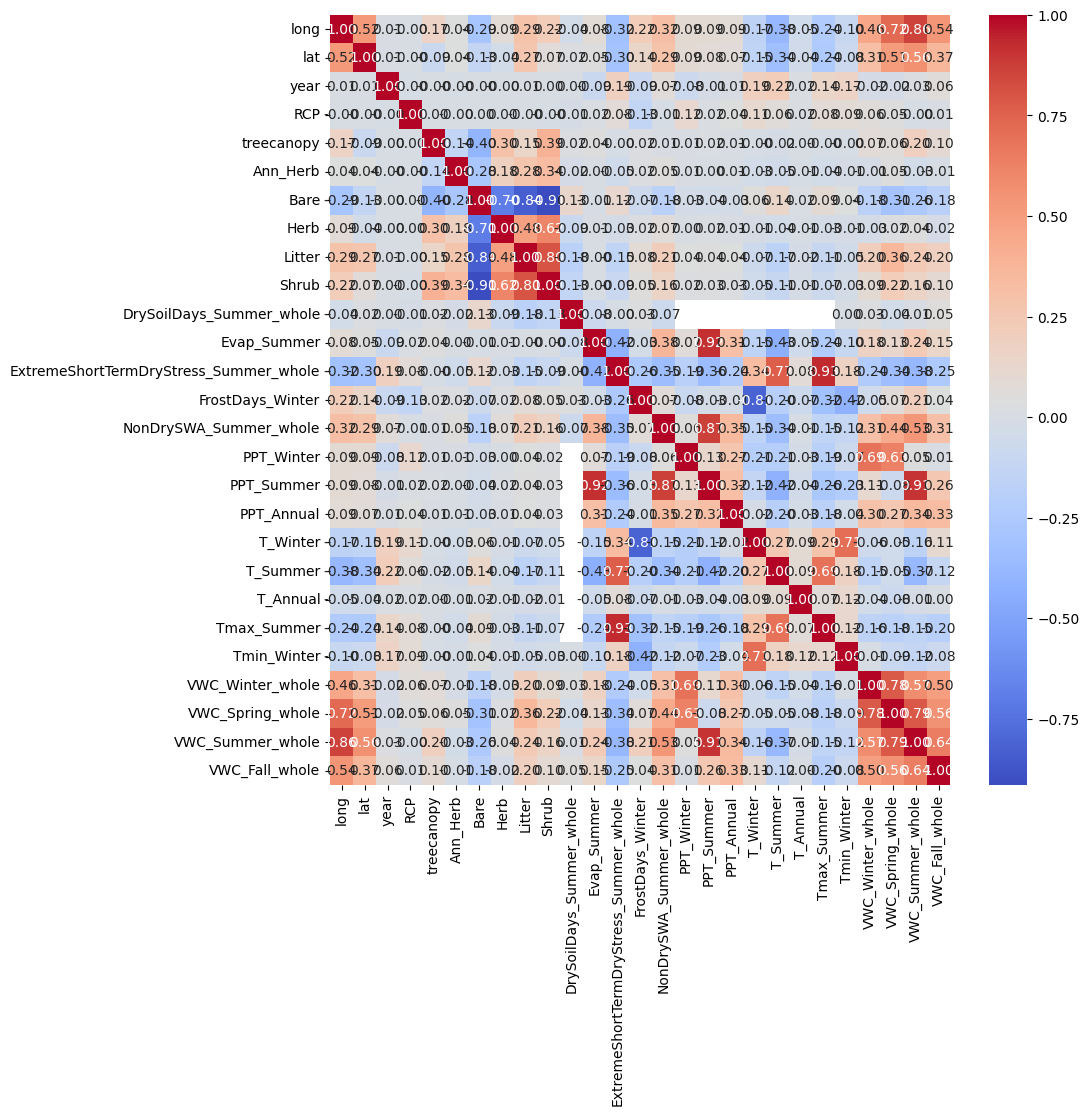

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Draw a heatmap of the correlation matrix

plt.figure(figsize=(10, 10))
sns.heatmap(nearterm.corr(), annot=True, cmap='coolwarm', fmt='.2f')

In [16]:
# what are the unique value pairs in the long and lat columns?

historic['long'].nunique(), historic['lat'].nunique()

# What is the min max range of the long and lat columns?

historic['long'].min(), historic['long'].max(), historic['lat'].min(), historic['lat'].max()


(-110.0472, -109.9659, 37.57034, 37.63476)

In [27]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd


# Create a map centered around an average location
m = folium.Map(location=[sum(historic["lat"]) / len(historic["lat"]), sum(historic["long"]) / len(historic["long"])], zoom_start=2)

# Add points to the map
for lat, long in zip(historic["lat"], historic["long"]):
    folium.Marker([lat, long]).add_to(m)

# Display the map
m.save('map.html')

# #Define coordinates of where we want to center our map
# boulder_coords = [37, -110]

# #Create the map
# my_map = folium.Map(location = boulder_coords, zoom_start = 15)

# #Display the map
# my_map

# marker_cluster = MarkerCluster().add_to(my_map)

# for idx, row in historic.iterrows():
#     # Get lat and lon of points
#     lon = row['long']
#     lat = row['lat']

#     # Get address information
#     # address = row['']
#     # Add marker to the map

#     folium.RegularPolygonMarker(location=[lat, lon], fill_color='#2b8cbe', number_of_sides=6, radius=8).add_to(marker_cluster)

